# Introduction to Linear Regression in R #

Response variable is the dependent variable.  
Explanatory variable is the independent variable.  

Linear regression: The response variable is numeric.  
Logistic regression: The response variable is logical.  
Simple linear/logistic regression: There is only one explanatory variable.  

To visualize the relation between two numeric variables a scatter plot is employed.

In [24]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(readr)

In [25]:
urlfile <- "https://raw.githubusercontent.com/abnr/ml-data/main/taiwan_real_estate2.csv"
taiwan_real_estate <- read_csv(url(urlfile))

Rows: 414 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): house_age_years
dbl (3): dist_to_mrt_m, n_convenience, price_twd_msq

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
head(taiwan_real_estate)

dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
<dbl>,<dbl>,<chr>,<dbl>
84.87882,10,30 to 45,11.467474
306.59470,9,15 to 30,12.768533
561.98450,5,0 to 15,14.311649
561.98450,5,0 to 15,16.580938
390.56840,5,0 to 15,13.040847
2175.03000,3,0 to 15,9.712557


`geom_smooth()` using formula = 'y ~ x'


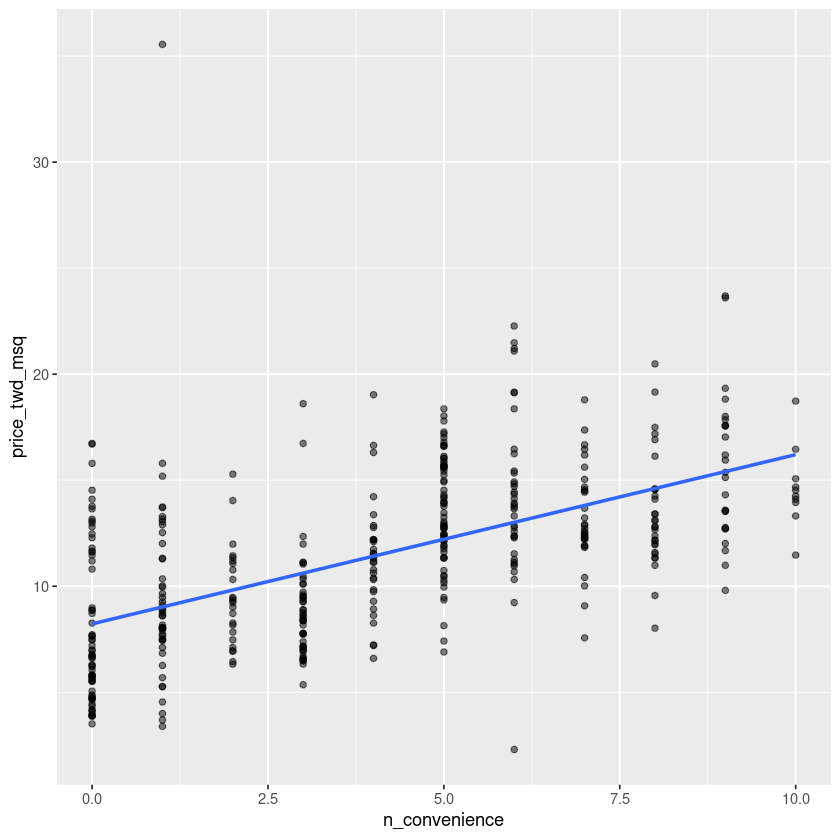

In [27]:
# Add a linear trend line without a confidence ribbon
ggplot(taiwan_real_estate, aes(n_convenience, price_twd_msq)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method="lm",se=FALSE)

## Fitting a linear regression
The equation of a line is $y=m*x+b$ where $m$ is the slope and $b$ the intercept at the origin.  
In R, the function is lm(y~x,data=)

In [28]:
# Run a linear regression of price_twd_msq vs. n_convenience
lm(price_twd_msq~n_convenience,data=taiwan_real_estate)


Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)

Coefficients:
  (Intercept)  n_convenience  
       8.2242         0.7981  


## Categorical explanatory variables

The explanatory variable is categorical. In case of a simple categorical variable the linear regression coefficients are the means.

In [29]:
library(readr)
library(tidyverse)
library(ggplot2)
urlfile <- "https://raw.githubusercontent.com/abnr/ml-data/main/taiwan_real_estate2.csv"
taiwan_real_estate <- read_csv(url(urlfile))

Rows: 414 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): house_age_years
dbl (3): dist_to_mrt_m, n_convenience, price_twd_msq

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


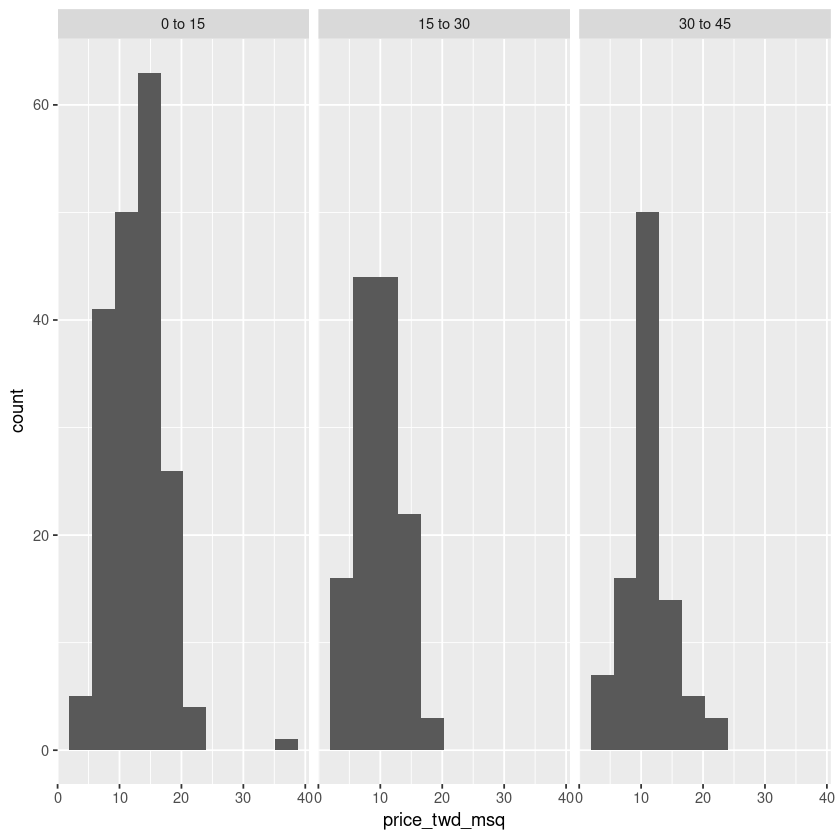

In [30]:
# Using taiwan_real_estate, plot price_twd_msq
ggplot(taiwan_real_estate,aes(price_twd_msq)) +
  # Make it a histogram with 10 bins
  geom_histogram(bins=10) +
  # Facet the plot so each house age group gets its own panel
  facet_wrap(~house_age_years)

In [31]:
summary_stats <- taiwan_real_estate %>% 
  # Group by house age
  group_by(house_age_years) %>% 
  # Summarize to calculate the mean house price/area
  summarize(mean_by_group = mean(price_twd_msq))

# See the result
summary_stats

house_age_years,mean_by_group
<chr>,<dbl>
0 to 15,12.637471
15 to 30,9.876743
30 to 45,11.393264


In [32]:
#Linear model formula to remove the intercept
mdl_price_vs_age_no_intercept <- lm(
  price_twd_msq ~ house_age_years+0, 
  data = taiwan_real_estate
)

# See the result
mdl_price_vs_age_no_intercept


Call:
lm(formula = price_twd_msq ~ house_age_years + 0, data = taiwan_real_estate)

Coefficients:
 house_age_years0 to 15  house_age_years15 to 30  house_age_years30 to 45  
                 12.637                    9.877                   11.393  


## Making predictions
Models let you make predictions. The linear model gives a function of a line that for each value of the explanatory value whe have one for the response variable. In R, we can define explanatory_data <- tibble(name_var=), and use the function predict predict(model,explanatory_data). The we can define a data frame predict_data <- explanatory_data %>% mutate(pre=predict(model,explanatory_data)).  

Extrapolating means making predictions outside the range of observed data.


In [33]:
# Create a tibble with n_convenience column from zero to ten
explanatory_data <- tibble(
  n_convenience = 0:10
)

mdl_price_vs_conv <- lm(
  price_twd_msq ~ n_convenience, 
  data = taiwan_real_estate
)


# Edit this, so predictions are stored in prediction_data
predict(mdl_price_vs_conv, explanatory_data)

# See the result
prediction_data <- explanatory_data %>% mutate(price_twd_msq=predict(mdl_price_vs_conv, explanatory_data))

print(prediction_data)

1         2         3         4         5         6         7         8 
 8.224237  9.022317  9.820397 10.618477 11.416556 12.214636 13.012716 13.810795 
        9        10        11 
14.608875 15.406955 16.205035

# A tibble: 11 × 2
   n_convenience price_twd_msq
           <int>         <dbl>
 1             0          8.22
 2             1          9.02
 3             2          9.82
 4             3         10.6 
 5             4         11.4 
 6             5         12.2 
 7             6         13.0 
 8             7         13.8 
 9             8         14.6 
10             9         15.4 
11            10         16.2 


`geom_smooth()` using formula = 'y ~ x'


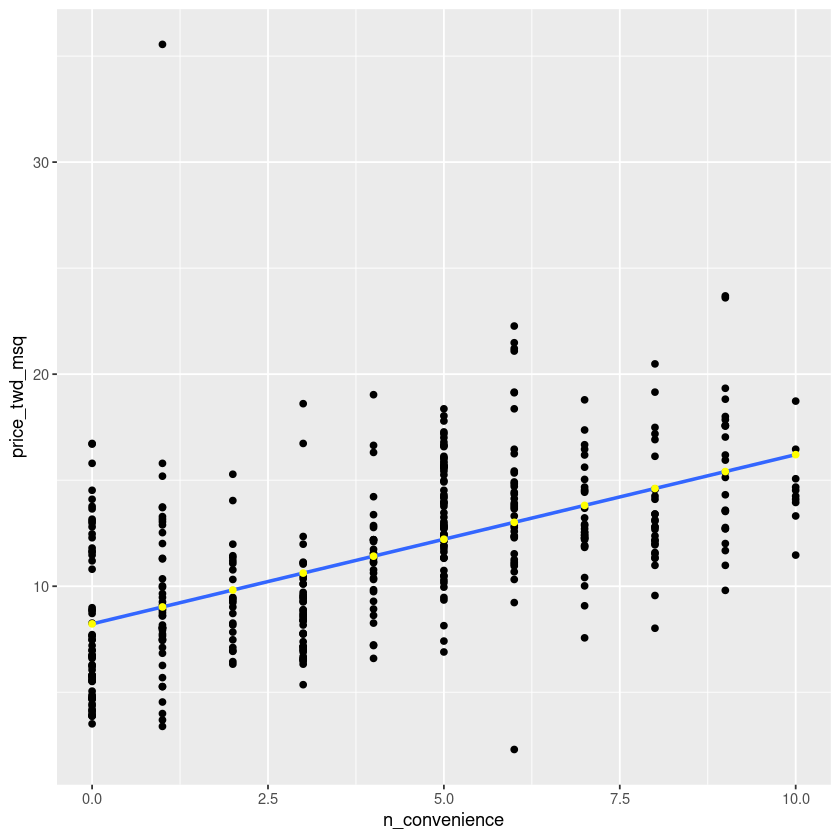

In [34]:
# Add to the plot
ggplot(taiwan_real_estate, aes(n_convenience, price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a point layer of prediction data, colored yellow
  geom_point(color='yellow',data=prediction_data)

## Working with model objects
The model objects created by lm function contains a lot of information.  

fitted() is jargon for predictions on the original dataset used to create the model.
residuals() gives a measure of the innacuraccy of the model fit. Each residual is the actual responde value minus the predcited response value. 
summary() shows a more extended print out of the details of the model.
glance() returns model-level results.

If the model has a good fit, the residuals follow a normal distribution.  

library(broom), tidy(model) makes the model a data frame and then you can manipulate it.


In [35]:
# Get the model coefficients of mdl_price_vs_conv
coefficients(mdl_price_vs_conv)
# Get the fitted values of mdl_price_vs_conv
fitted(mdl_price_vs_conv)
# Get the residuals of mdl_price_vs_conv
residuals(mdl_price_vs_conv)
# Print a summary of mdl_price_vs_conv
summary(mdl_price_vs_conv)

(Intercept) n_convenience 
    8.2242375     0.7980797

1         2         3         4         5         6         7         8 
16.205035 15.406955 12.214636 12.214636 12.214636 10.618477 13.810795 13.012716 
        9        10        11        12        13        14        15        16 
 9.022317 10.618477  9.022317 15.406955 12.214636 11.416556 11.416556  9.820397 
       17        18        19        20        21        22        23        24 
13.012716  9.022317 14.608875 13.810795 10.618477 13.810795  9.022317 13.810795 
       25        26        27        28        29        30        31        32 
11.416556  9.820397 12.214636 12.214636 11.416556 12.214636  8.224237 13.810795 
       33        34        35        36        37        38        39        40 
 9.022317 13.012716 13.810795  8.224237  9.820397  9.022317 13.012716 12.214636 
       41        42        43        44        45        46        47        48 
 8.224237  8.224237 12.214636 13.012716 11.416556 14.608875 15.406955 10.618477 
       49        50        51        52        53        54        55        56 
 8.224237  9.022317 11.416556  9.022317 10.618477 12.214636 12.214636  8.224237 
       57        58        59        60        61        62        63        64 
14.608875 13.810795  9.022317 12.214636  9.820397 13.012716 10.618477 11.416556 
       65        66        67        68        69        70        71        72 
 8.224237 14.608875 13.012716 12.214636 13.012716 12.214636 15.406955 10.618477 
       73        74        75        76        77        78        79        80 
14.608875  8.224237 16.205035  9.022317 10.618477 10.618477  9.820397  9.022317 
       81        82        83        84        85        86        87        88 
11.416556 13.012716 13.810795 10.618477 13.810795 15.406955  9.022317  8.224237 
       89        90        91        92        93        94        95        96 
 8.224237  8.224237  9.022317  8.224237 11.416556  8.224237 12.214636 12.214636 
       97        98        99       100       101       102       103       104 
15.406955 10.618477 12.214636 15.406955 11.416556  9.022317 13.012716 13.012716 
      105       106       107       108       109       110       111       112 
13.012716 13.012716 14.608875  9.022317  9.820397 10.618477 12.214636 13.810795 
      113       114       115       116       117       118       119       120 
10.618477 13.012716 14.608875  9.820397  9.022317  8.224237 10.618477 12.214636 
      121       122       123       124       125       126       127       128 
12.214636 12.214636 11.416556  8.224237 13.810795 13.012716 11.416556 12.214636 
      129       130       131       132       133       134       135       136 
13.012716 13.810795 14.608875 10.618477 12.214636 14.608875 13.012716  8.224237 
      137       138       139       140       141       142       143       144 
12.214636 13.012716  8.224237 12.214636 12.214636 10.618477 12.214636 12.214636 
      145       146       147       148       149       150       151       152 
 9.022317 12.214636  8.224237 14.608875  8.224237 14.608875 13.810795 15.406955 
      153       154       155       156       157       158       159       160 
 9.022317 13.012716  8.224237  8.224237  8.224237 11.416556 12.214636 11.416556 
      161       162       163       164       165       166       167       168 
14.608875 10.618477  8.224237 12.214636  8.224237  9.022317 13.012716 14.608875 
      169       170       171       172       173       174       175       176 
12.214636  9.022317  8.224237 12.214636 15.406955 11.416556 13.810795 10.618477 
      177       178       179       180       181       182       183       184 
 8.224237 15.406955 11.416556  9.022317  8.224237 14.608875 10.618477  8.224237 
      185       186       187       188       189       190       191       192 
 8.224237 10.618477 10.618477  8.224237 14.608875  8.224237 14.608875  9.820397 
      193       194       195       196       197       198       199       200 
13.810795 12.214636  8.224237 12.214636

1             2             3             4             5 
 -4.737561094  -2.638422376   2.097012981   4.366301937   0.826211165 
            6             7             8             9            10 
 -0.905919870  -1.617149478   1.117390148  -3.333966186  -3.931638479 
           11            12            13            14            15 
  3.504157868   2.172470211  -0.323561906  -4.215346032  -1.038341493 
           16            17            18            19            20 
  5.459482085   8.197571691   2.293870425  -1.810085473   0.621882292 
           21            22            23            24            25 
 -1.753121081   1.801912549  -1.579049393   0.682396664   0.323231880 
           26            27            28            29            30 
 -1.650956644   4.789902542  -2.048221512   2.804321139   5.062217217 
           31            32            33            34            35 
 -1.537399329  -6.246498949   1.325640471   1.904076986   2.860914062 
           36            37            38            39            40 
  0.035974348  -2.891501273  -1.367249091   1.419962009   1.764183934 
           41            42            43            44            45 
 -3.413344866  -2.717429586  -1.715392466  -2.695015299   4.892066979 
           46            47            48            49            50 
 -3.020372916  -2.698936748   7.989692838  -4.169774518  -5.028368607 
           51            52            53            54            55 
  1.957119929  -2.759079650  -2.449036361  -0.444590650   3.428329168 
           56            57            58            59            60 
 -4.079002960  -1.931114217   2.376799085  -2.184193115   0.614410863 
           61            62            63            64            65 
 -3.375616251   6.109825851  -2.237236058   5.224896026  -0.569169374 
           66            67            68            69            70 
 -1.204941751   2.327677591   4.971445659  -2.059614391   0.493382118 
           71            72            73            74            75 
  2.444784886   1.726455319  -3.625516638  -2.172800236   0.254874610 
           76            77            78            79            80 
 -0.096447275   0.516167875  -2.872636966  -0.803755434  -1.004162858 
           81            82            83            84            85 
  0.777089672  -1.878071274   0.742911036  -5.262954666  -0.588405151 
           86            87            88            89            90 
 -0.036304373  -0.852876927  -2.687172400   6.299211866  -0.569169374 
           91            92            93            94            95 
  4.714445312   4.846866935  -4.820489753  -3.352830494   0.190810258 
           96            97            98            99           100 
  3.458586354   2.596070816  -0.149490218   3.216528866   3.413014841 
          101           102           103           104           105 
  0.141688764   0.932297051   3.447193476   0.814818287  -3.784273998 
          106           107           108           109           110 
  8.469886366  -0.357740541  -0.973905672   0.497303568  -2.025435755 
          111           112           113           114           115 
  3.398071982  -1.889464153  -3.629066618 -10.713169610   1.518204996 
          116           117           118           119           120 
  4.218937456  -5.330940467  -4.290803262  -1.359777662   5.818646869 
          121           122           123           124           125 
 -2.744136792   2.308813283  -1.582970843   5.542782214   3.556829342 
          126           127           128           129           130 
  1.692276683   7.615213726   4.426816309   5.353396199  -1.405349176 
          131           132           133           134           135 
 -3.262430405  -1.329520476  -0.868191255  -2.657286683  -0.244183226 
          136           137           138           139           140 
 -1.930742748   1.945727050   1.329190450   4.937638493   0.644668049 
          141           142         


Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7132  -2.2213  -0.5409   1.8105  26.5299 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.22424    0.28500   28.86   <2e-16 ***
n_convenience  0.79808    0.05653   14.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.384 on 412 degrees of freedom
Multiple R-squared:  0.326,	Adjusted R-squared:  0.3244 
F-statistic: 199.3 on 1 and 412 DF,  p-value: < 2.2e-16


In [36]:
# Get the coefficients of mdl_price_vs_conv
coeffs <- coefficients(mdl_price_vs_conv)

# Get the intercept
intercept <- coeffs[1]

# Get the slope
slope <- coeffs[2]

explanatory_data %>% 
  mutate(
    # Manually calculate the predictions
    price_twd_msq = intercept+slope*n_convenience
  )

# Compare to the results from predict()
predict(mdl_price_vs_conv, explanatory_data)

n_convenience,price_twd_msq
<int>,<dbl>
0,8.224237
1,9.022317
2,9.820397
3,10.618477
4,11.416556
5,12.214636
6,13.012716
7,13.810795
8,14.608875


1         2         3         4         5         6         7         8 
 8.224237  9.022317  9.820397 10.618477 11.416556 12.214636 13.012716 13.810795 
        9        10        11 
14.608875 15.406955 16.205035

In [37]:
library(broom)
tidy(mdl_price_vs_conv)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.2242375,0.28499836,28.85714,5.807884e-101
n_convenience,0.7980797,0.05652919,14.11801,3.413483e-37


In [38]:
augment(mdl_price_vs_conv)

price_twd_msq,n_convenience,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.467474,10,16.205035,-4.7375611,0.012148997,3.379833,1.220128e-02,-1.40861783
12.768533,9,15.406955,-2.6384224,0.009131801,3.385478,2.827167e-03,-0.78328617
14.311649,5,12.214636,2.0970130,0.002644427,3.386418,5.104721e-04,0.62052630
16.580938,5,12.214636,4.3663019,0.002644427,3.381131,2.213081e-03,1.29203071
13.040847,5,12.214636,0.8262112,0.002644427,3.387756,7.924135e-05,0.24448382
9.712557,3,10.618477,-0.9059199,0.002749584,3.387706,9.907779e-05,-0.26808453
12.193646,7,13.810795,-1.6171495,0.004771833,3.387058,5.501466e-04,-0.47904126
14.130106,6,13.012716,1.1173901,0.003429060,3.387552,1.882376e-04,0.33077662
5.688351,1,9.022317,-3.3339662,0.005087304,3.383988,2.494470e-03,-0.98776307


In [39]:
# Get the model-level elements of the model
glance(mdl_price_vs_conv)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3260466,0.3244108,3.383888,199.3182,3.413483e-37,1,-1091.115,2188.229,2200.307,4717.686,412,414


## Regression to the mean 
Residual exist due to problems in the model and fundamental randomness.  
Extreme cases are often due to randomness.
Regression to the mean means extreme cases don't persist over time.

## Transforming variables
Sometimes the relation between the explanatory and responsive variables is not linear.  Transforming the explanatory variable

If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

We'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!  

Notice that we need to call for a new data set.

`geom_smooth()` using formula = 'y ~ x'


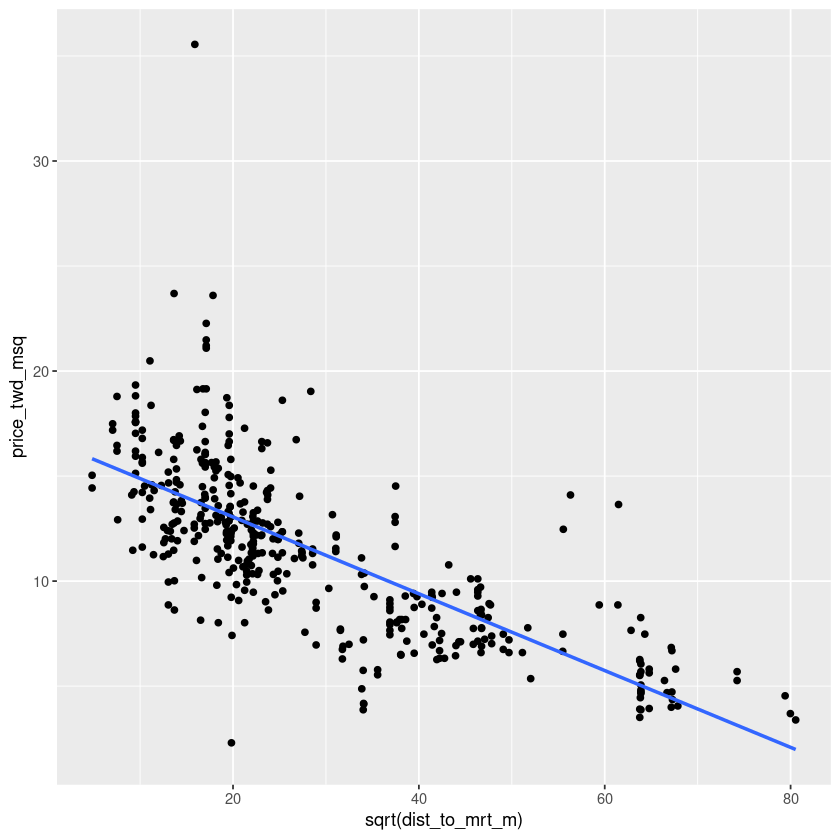

In [40]:
# Run the code to see the plot
# Edit so x-axis is square root of dist_to_mrt_m
ggplot(taiwan_real_estate, aes(sqrt(dist_to_mrt_m), price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

In [41]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist <- lm(price_twd_msq ~ sqrt(dist_to_mrt_m),data=taiwan_real_estate)

# See the result
mdl_price_vs_dist


Call:
lm(formula = price_twd_msq ~ sqrt(dist_to_mrt_m), data = taiwan_real_estate)

Coefficients:
        (Intercept)  sqrt(dist_to_mrt_m)  
            16.7098              -0.1828  


In [42]:
#Create a tibble
explanatory_data <- tibble(
  dist_to_mrt_m = seq(0, 80, 10) ^ 2
)

# Create a data frame of prediction data named prediction_data. Start with explanatory_data, and add a column named after the response variable. Predict values using mdl_price_vs_dist and explanatory_data.
prediction_data <- explanatory_data %>% mutate(price_twd_msq=predict(mdl_price_vs_dist,explanatory_data))

# See the result
prediction_data


dist_to_mrt_m,price_twd_msq
<dbl>,<dbl>
0,16.709799
100,14.881370
400,13.052942
900,11.224513
1600,9.396085
2500,7.567656
3600,5.739227
4900,3.910799
6400,2.082370


`geom_smooth()` using formula = 'y ~ x'


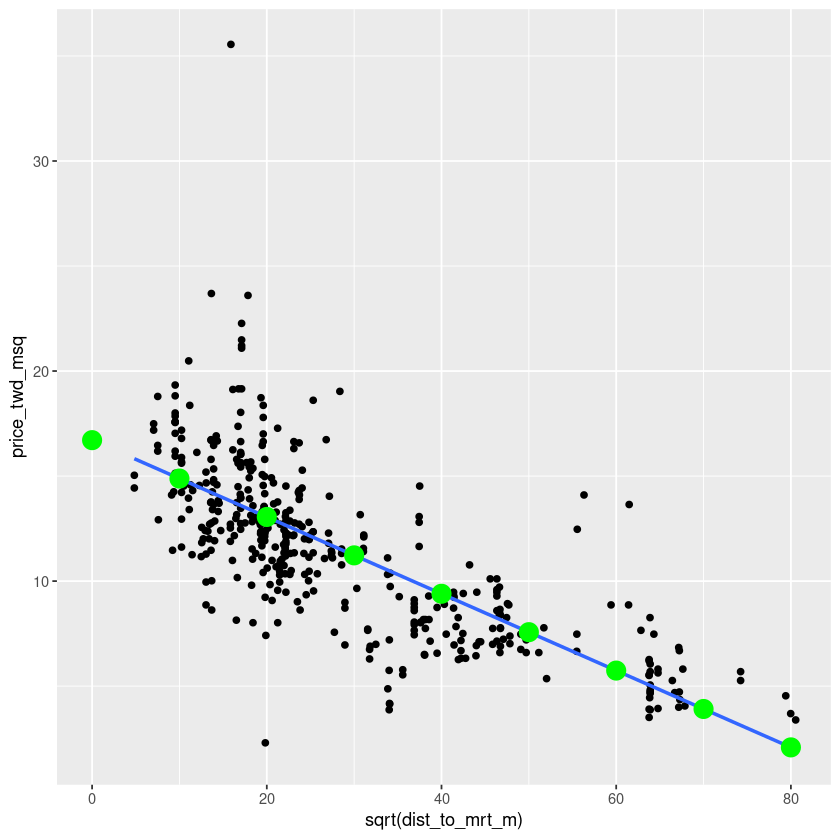

In [43]:
ggplot(taiwan_real_estate, aes(sqrt(dist_to_mrt_m), price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add points from prediction_data, colored green, size 5
  geom_point(data=prediction_data,size=5,color="green")

## Quantifying model fit
A metric the quantify the linearity is the coefficient of determination, also called "r-squared" or "R-squared". It is defined as the proportion of the variance in the responsible variable that is predictable frmo the explanatory variable. 1 means a perfect fit whereas 0 is the worst.  
summary() shows several performance metrics at the end of its output.
Since summary is not easy to program with, a better way to extract the metric is tou use glance() from library(broom), and then pull(r.squared)

The second metric is the residual standard error or RSE. Recalling that each residual is the difference between the predicted value and the observed value. The RSE, very roughly speaking, is a measure of the size of the residuals.  
It has the same units that the response variable. We can obtain
model %>% glance() %>% pull(sigma)

Another relate metric is the Root-mean-square-error (RMSE), but tipically it is used the RSE. 

## Visualizing model fit
If a linear regression model is a good fit, then the residuals are approximately normally distributed with mean zero.

The second plot is the Q-Q plot. it shows whether or not the residuals follow a normal distribution. If the points track along the straight line they are normally distributed.  

The third plot shows the square root of the standardized residuals versus the fitted values. It's often called a scale-location plot. This plot shows whether the size of the residuals gets bigger or smaller.  

In R, drawing the plots are straightforward. Load the packages ggplot2 and ggfortify. Then, autoplot(mode,which=?) where ?=1 to obtain residuals vs fitted values, ?=2 Q-Q plot, and ?=3 for scale location. 

In [ ]:
library(ggplot2)
library(ggfortify)
# Plot the three diagnostics for mdl_price_vs_conv
autoplot(mdl_price_vs_conv,1:3,nrow=3,ncol=1)

ERROR: Error in library(ggfortify): there is no package called ‘ggfortify’


## Outliers, leverage, and influence 
The technical form for an unusual data point is an outlier.  
The first kind of outlier is when you have explanatory variables that are extreme.  
The other property of outliers is when the point lies a long way from the model predictions.  

Leverage is a mesure of how extreme explanatory variable values are for each observation. Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.  
In R, we employ the function hatvalues(model). It returns a numeric vector.
We can also use library(broom) and model %>% augment()

Influence measures how much the model would change if you left the observation out of the dataset when modeling. The influence of each observation is based on the size of the residuals and leverage.  
The Cook's distance is the most common measure of influence. The cooks.distance(model) function returns the values as a vector.

Leverage and influence can be retrieved from the summary frame.  
In autoplot use the arguments which=4:6 to get the cook's distance, residuals vs leverage, and cook's dist vs leverage.

In [ ]:
#Augment mdl_price_vs_dist, then arrange observations by descending influence (.hat), and get the head of the results.
mdl_price_vs_dist %>% 
  # Augment the model
  augment() %>% 
  # Arrange rows by descending leverage
  arrange(desc(.hat)) %>% 
  # Get the head of the dataset
  head()

price_twd_msq,sqrt(dist_to_mrt_m),.fitted,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.388805,80.54825,1.982126,0.02666524,2.820143,0.0035077120,0.50604061
3.691377,79.97677,2.086619,0.02613525,2.819879,0.0044695281,0.57714091
4.538578,79.41129,2.190012,0.02561660,2.818577,0.0093730405,0.84442186
5.688351,74.24310,3.134978,0.02114202,2.818146,0.0090604283,0.91595888
5.264750,74.24310,3.134978,0.02114202,2.819021,0.0063035699,0.76400271
4.054463,67.86567,4.301046,0.01628058,2.820993,0.0000644269,-0.08823672


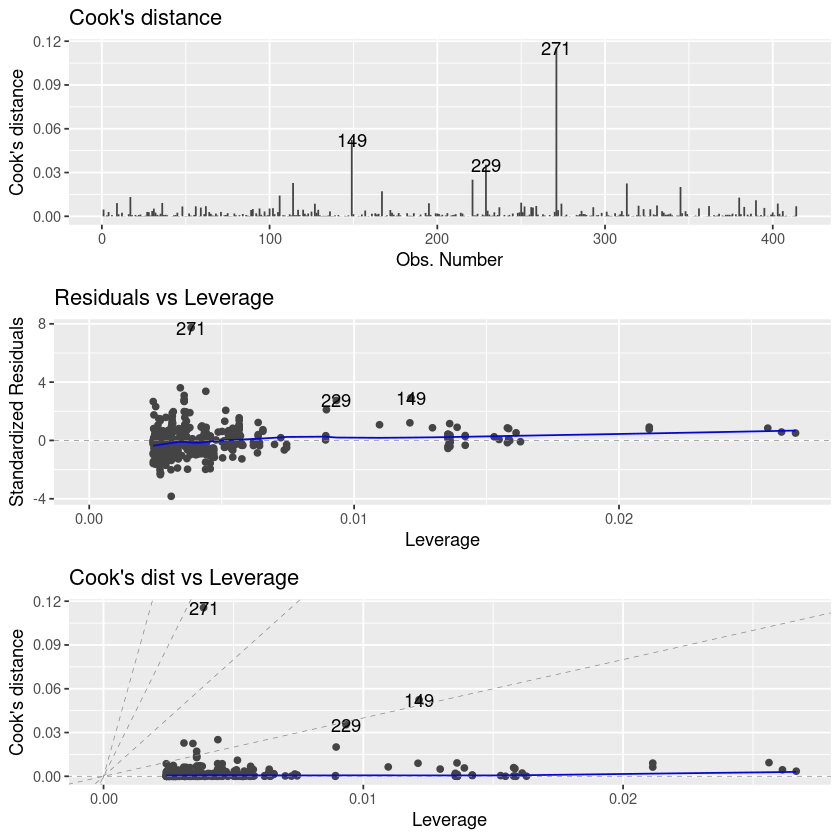

In [ ]:
# Plot the three outlier diagnostics for mdl_price_vs_dist
autoplot(mdl_price_vs_dist,which=4:6,nrow=3,ncol=1)

## Logistic regression
Logistic regression is another type of generalized model used when the response variable is logical.  
The responses follow the logistic curve  
$$ f(x)= \frac{1}{1+e^{-x}} $$
To perform a logistic regression in R, we use the glm(y~x,data=,family=gaussian). The argument family indicates the distribution of the residuals

In [45]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(readr)
url_link="https://raw.githubusercontent.com/cmuro27/Data_Analysis_Projects/main/churn.csv"
churn <- read_csv(url_link)

Rows: 400 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): has_churned, time_since_first_purchase, time_since_last_purchase

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
str(churn)

spc_tbl_ [400 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ has_churned              : num [1:400] 0 0 0 0 0 0 0 0 0 0 ...
 $ time_since_first_purchase: num [1:400] -1.0892 1.183 -0.8462 0.0869 -1.1666 ...
 $ time_since_last_purchase : num [1:400] -0.721 3.634 -0.428 -0.536 -0.673 ...
 - attr(*, "spec")=
  .. cols(
  ..   has_churned = col_double(),
  ..   time_since_first_purchase = col_double(),
  ..   time_since_last_purchase = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


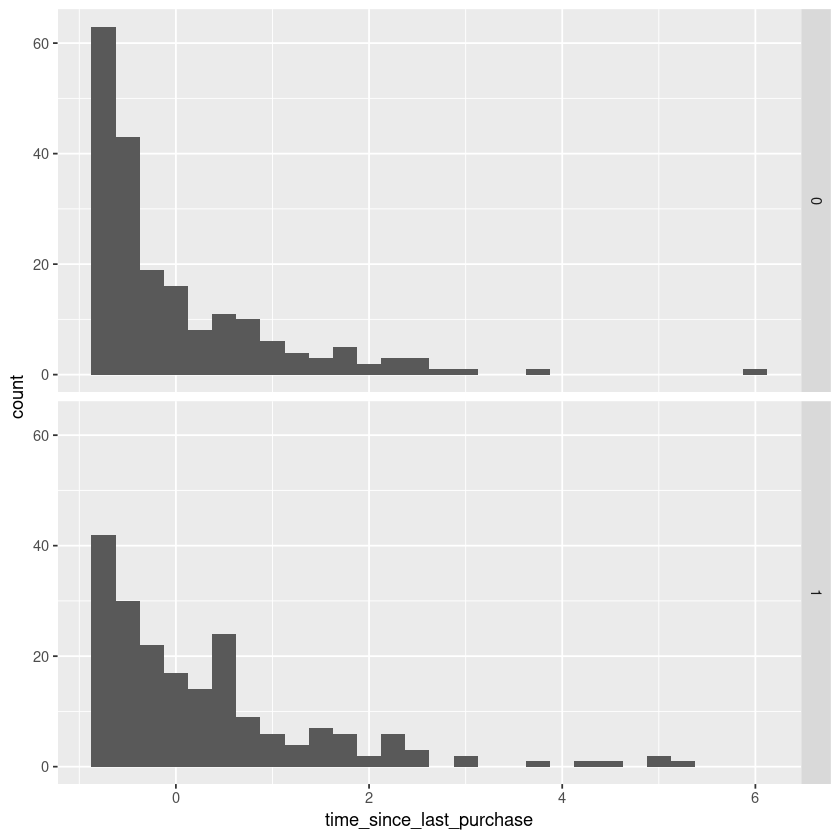

In [46]:
# Using churn, plot time_since_last_purchase
ggplot(data=churn,aes(time_since_last_purchase)) +
  # as a histogram with binwidth 0.25
  geom_histogram(binwidth=0.25) +
  # faceted in a grid with has_churned on each row
  facet_grid(rows=vars(has_churned))

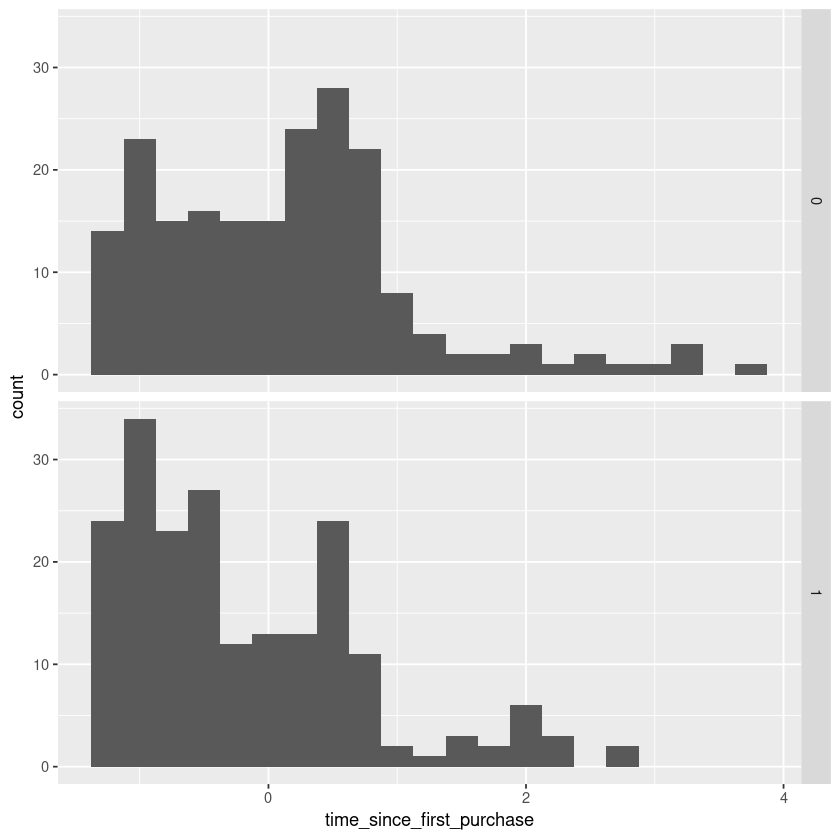

In [ ]:
# Redraw the plot with time_since_first_purchase
ggplot(data=churn,aes(time_since_first_purchase))+geom_histogram(binwidth=0.25)+facet_grid(rows=vars(has_churned))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


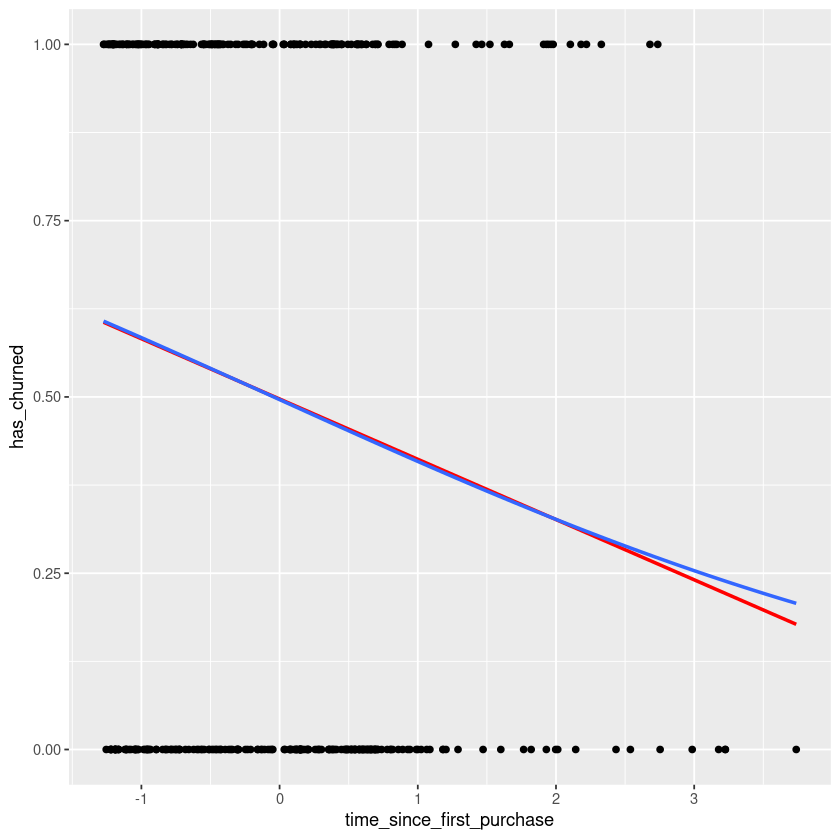

In [ ]:
# Using churn plot has_churned vs. time_since_first_purchase
ggplot(data=churn,aes(x=time_since_first_purchase,y=has_churned)) +
  # Make it a scatter plot
   geom_point() +
  # Add an lm trend line, no std error ribbon, colored red
  geom_smooth(method="lm",se=FALSE,color="red")+
   # Add a glm trend line, no std error ribbon, binomial family
   geom_smooth(method="glm",se=FALSE,method.args=list(family=binomial))

In [47]:
# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship <- glm(has_churned ~ time_since_first_purchase, data=churn, family = binomial)


# See the result
mdl_churn_vs_relationship


Call:  glm(formula = has_churned ~ time_since_first_purchase, family = binomial, 
    data = churn)

Coefficients:
              (Intercept)  time_since_first_purchase  
                 -0.01518                   -0.35479  

Degrees of Freedom: 399 Total (i.e. Null);  398 Residual
Null Deviance:	    554.5 
Residual Deviance: 543.7 	AIC: 547.7

## Predictions and odds ratios
For predictions, we employ the same technique as for linear models. Create a DataFrame of explanatory variable values. Then add a response column calculated using the predict method.   
To get the most likely outcome, beyond 0.5 probability, then we simply round the predicted probabilites with the function round().   

The odds ratio is defined as the probability that something happens divided between the probability it does not.  
One nice property of logistic regression odds ratios is that on a log-scale, they change linearly with the explanatory variable.  
This nice property of the logarithm of odds ratios means log-odds ratio is another common way of describing logistic regression predictions. In fact, the log-odds ratio is also known as the logit, hence the name of the function you've been using to model logistic regression. 

In [48]:
explanatory_data <- data.frame(time_since_first_purchase=seq(-1.5,0.75,0.25))
print(explanatory_data)

   time_since_first_purchase
1                      -1.50
2                      -1.25
3                      -1.00
4                      -0.75
5                      -0.50
6                      -0.25
7                       0.00
8                       0.25
9                       0.50
10                      0.75


In [49]:
str(explanatory_data)

'data.frame':	10 obs. of  1 variable:
 $ time_since_first_purchase: num  -1.5 -1.25 -1 -0.75 -0.5 -0.25 0 0.25 0.5 0.75


Warning message in geom_smooth(method = "glm", family = binomial):
“Ignoring unknown parameters: `family`”
`geom_smooth()` using formula = 'y ~ x'


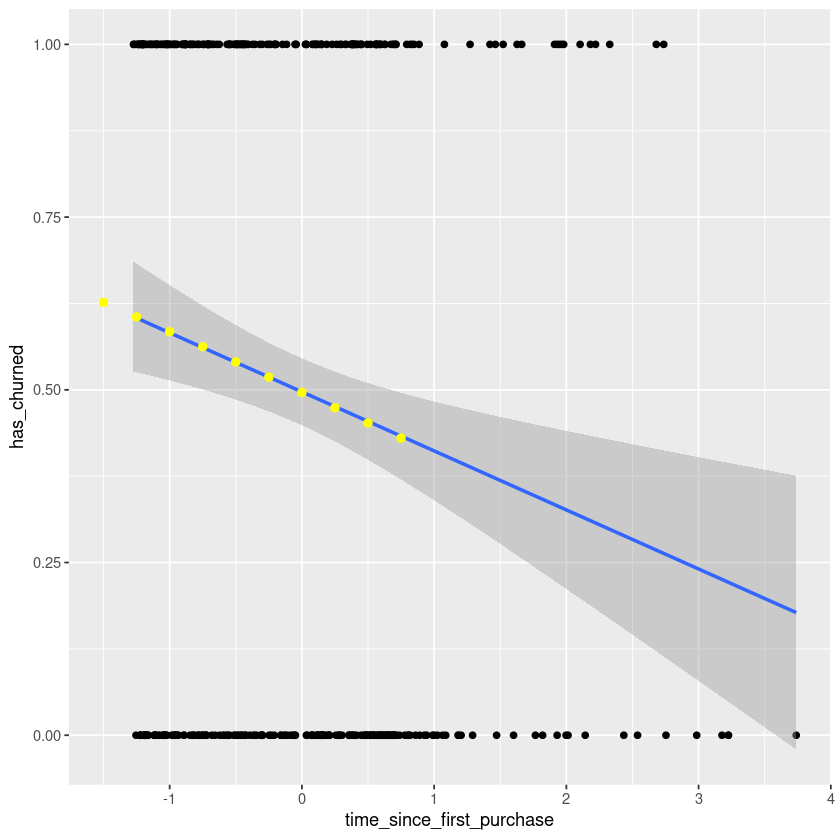

In [51]:
# Make a data frame of predicted probabilities
prediction_data <- explanatory_data %>% mutate(has_churned=predict(mdl_churn_vs_relationship,explanatory_data,type = "response"))
# Update the plot
ggplot(data=churn,aes(x=time_since_first_purchase,y=has_churned)) + geom_point()+
  geom_smooth(method="glm",family=binomial)+ 
  # Add points from prediction_data, colored yellow, size 2
  geom_point(data=prediction_data,color="yellow",size=2)


   time_since_first_purchase has_churned most_likely_outcome
1                      -1.50   0.6264479                   1
2                      -1.25   0.6054699                   1
3                      -1.00   0.5840959                   1
4                      -0.75   0.5624009                   1
5                      -0.50   0.5404646                   1
6                      -0.25   0.5183703                   1
7                       0.00   0.4962039                   0
8                       0.25   0.4740525                   0
9                       0.50   0.4520027                   0
10                      0.75   0.4301398                   0


Warning message in geom_smooth(method = "glm", family = binomial):
“Ignoring unknown parameters: `family`”
`geom_smooth()` using formula = 'y ~ x'


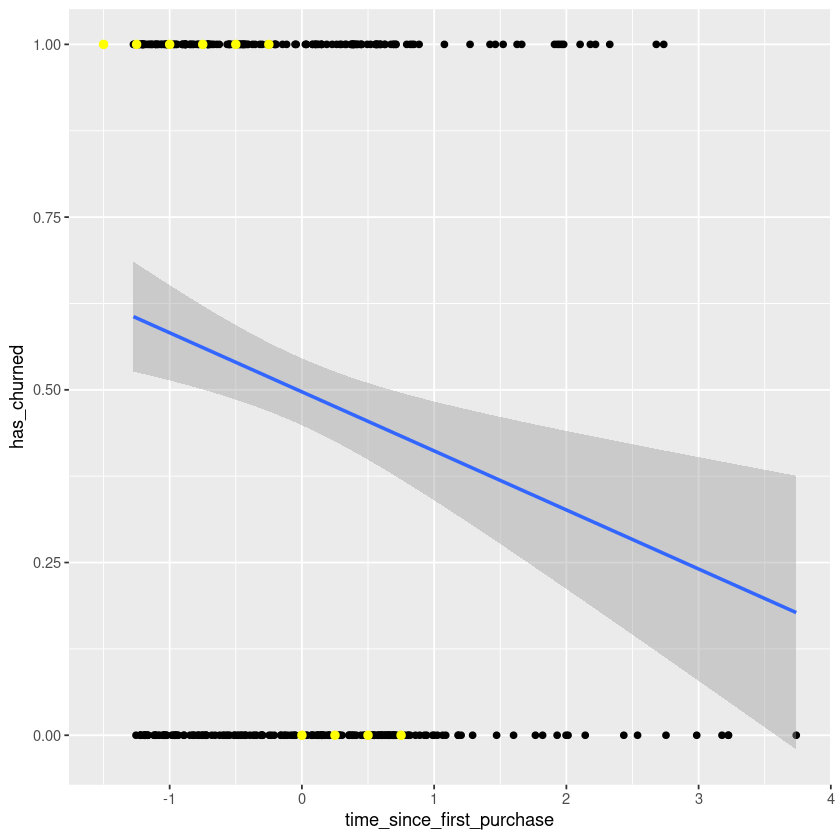

In [52]:
#Update prediction_data to add a column of the most likely churn outcome, most_likely_outcome.
# Update the data frame
prediction_data <- explanatory_data %>% 
  mutate(   
    has_churned = predict(mdl_churn_vs_relationship, explanatory_data, type = "response"),
    # Add the most likely churn outcome
    most_likely_outcome = round(has_churned)
  )

# See the result
print(prediction_data)

# Update the plot
ggplot(data=churn,aes(x=time_since_first_purchase,y=has_churned)) + geom_point()+
  geom_smooth(method="glm",family=binomial)+ 
  # Add most likely outcome points from prediction_data, colored yellow, size 2
    geom_point(data=prediction_data,aes(x=time_since_first_purchase,y=most_likely_outcome),color="yellow",size=2)



Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it maybe more intuitive to say "the chance of them not churning is four times higher than the chance of them churning". 

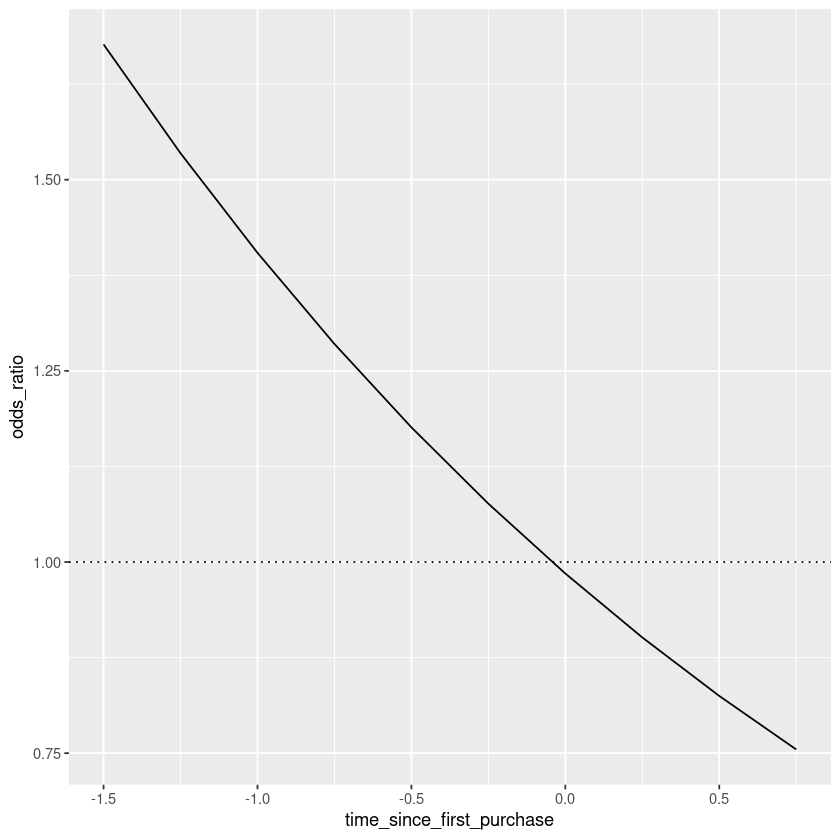

In [53]:
#Update prediction_data to add a column, odds_ratio, of the odds ratios.
prediction_data <- explanatory_data %>% 
  mutate(   
    has_churned = predict(
      mdl_churn_vs_relationship, explanatory_data, 
      type = "response"
    ),
    # Add the odds ratio
    odds_ratio = has_churned/(1-has_churned)
  )

# Using prediction_data, plot odds_ratio vs. time_since_first_purchase
ggplot(data=prediction_data,aes(x=time_since_first_purchase,y=odds_ratio)) +
  # Make it a line plot
  geom_line() +
  # Add a dotted horizontal line at y = 1
  geom_hline(yintercept=1,linetype="dotted")

In [54]:
#Update prediction_data to add the log odds ratio calculated two ways. Calculate it from the odds_ratio, then directly using predict().
prediction_data <- explanatory_data %>% 
  mutate(   
    has_churned = predict(mdl_churn_vs_relationship, explanatory_data, type = "response"),
    odds_ratio = has_churned / (1 - has_churned),
    # Add the log odds ratio from odds_ratio
    log_odds_ratio =log(odds_ratio),
    # Add the log odds ratio using predict()
    log_odds_ratio2 = predict(mdl_churn_vs_relationship,explanatory_data)
  )

# See the result
prediction_data


time_since_first_purchase,has_churned,odds_ratio,log_odds_ratio,log_odds_ratio2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.50,0.6264479,1.6770025,0.51700798,0.51700798
-1.25,0.6054699,1.5346606,0.42830923,0.42830923
-1.00,0.5840959,1.4044004,0.33961048,0.33961048
-0.75,0.5624009,1.2851966,0.25091173,0.25091173
-0.50,0.5404646,1.1761107,0.16221298,0.16221298
-0.25,0.5183703,1.0762839,0.07351423,0.07351423
0.00,0.4962039,0.9849302,-0.01518451,-0.01518451
0.25,0.4740525,0.9013305,-0.10388326,-0.10388326
0.50,0.4520027,0.8248267,-0.19258201,-0.19258201


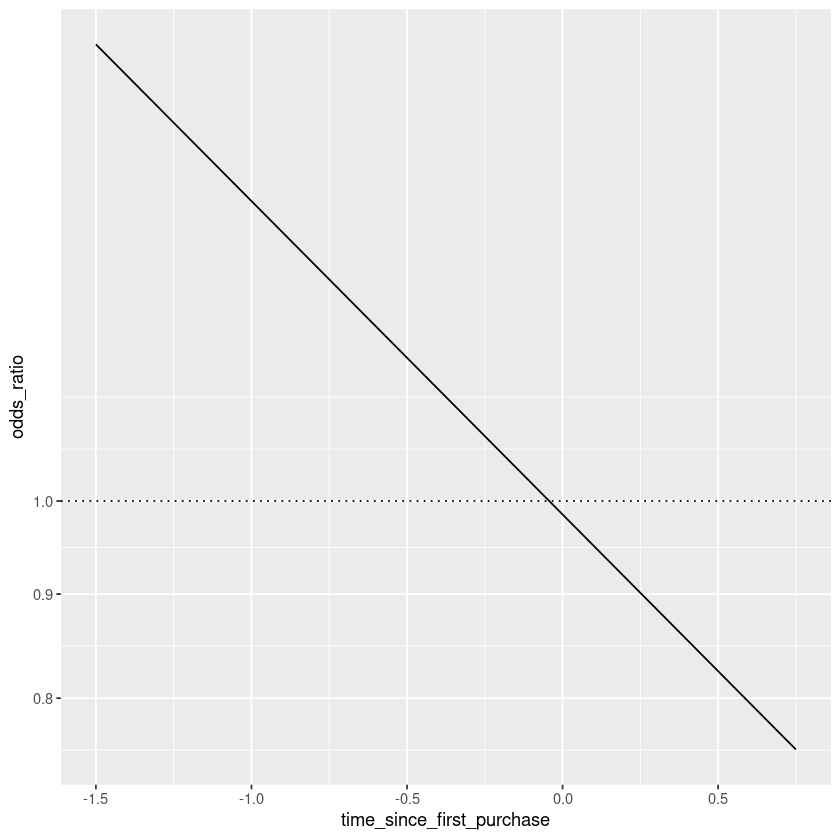

In [55]:
# Update the data frame
prediction_data <- explanatory_data %>% 
  mutate(   
    has_churned = predict(mdl_churn_vs_relationship, explanatory_data, type = "response"),
    odds_ratio = has_churned / (1 - has_churned),
    log_odds_ratio = log(odds_ratio)
  )

# Update the plot
ggplot(prediction_data, aes(time_since_first_purchase, odds_ratio)) +
  geom_line() +
  geom_hline(yintercept = 1, linetype = "dotted") +
  # Use a logarithmic y-scale
  scale_y_log10()

## Quantifying logistic regression fit
We will look at confusion matrices to quantify fit.  
A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression).
We can have four outcomes in a model:  

|                  | **predicted false** | **predicted true** |
|------------------|---------------------|--------------------|
| **actual false** | correct             | false positive     |
| **actual true**  | false negative      | correct            |

The counts of each outcome are called confusion matrix.  

| **true negative**  | **false positive** |
|--------------------|--------------------|
| **false negative** | **true positive**  |

The library(yardstick) lets you easily plot the confusion matrix. Employing conf_mat(outcomes)

We can also perform the model fit by using performance metrics. 

The first metric is Accuracy which is the proportion of correct predictions.  

The second metric is Sensitivity which is the proportion of true positives (true positives divided by the sum of false negatives and true positives).  

The third metric is Specificity which is the proportion of true negatives (true negatives divided by the sum of true negatives and false positives).

Increasing specificity will decrease sensitivity, or increasing sensitivity will decrease specificity

In [56]:
# Get the actual responses from the dataset
actual_response <- churn$has_churned

# Get the "most likely" responses from the model
predicted_response <- round(fitted(mdl_churn_vs_relationship))

# Create a table of counts
outcomes <- table(predicted_response,actual_response)

# See the result
outcomes

                  actual_response
predicted_response   0   1
                 0 112  76
                 1  88 124

In [59]:
install.packages("yardstick")

Installing yardstick [1.1.0] ...
	OK [linked cache]


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5900000
kap,binary,0.1800000
sens,binary,0.6200000
spec,binary,0.5600000
ppv,binary,0.5849057
npv,binary,0.5957447
mcc,binary,0.1803249
j_index,binary,0.1800000
bal_accuracy,binary,0.5900000


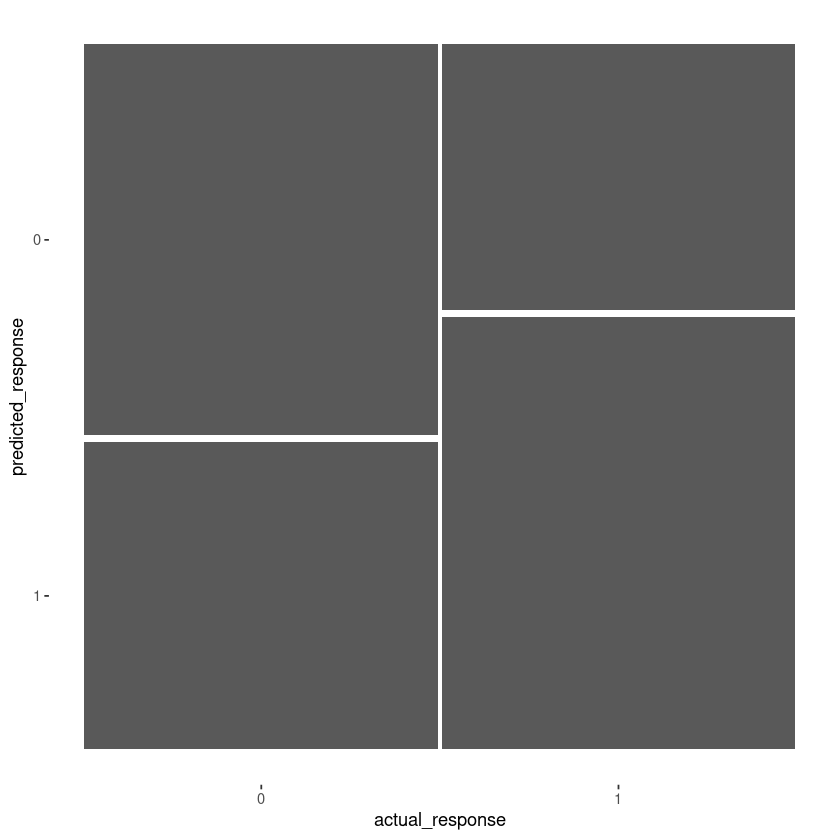

In [60]:
# Convert outcomes to a yardstick confusion matrix
library(yardstick)
confusion <- conf_mat(outcomes)

# Plot the confusion matrix
autoplot(confusion)

# Get performance metrics for the confusion matrix
summary(confusion,event_level="second")